In [1]:
import csv
import pandas as pd


In [2]:
dataset_01 = "Dataset/Plant_1_Generation_Data.csv"
dataset_02 = "Dataset/Plant_2_Generation_Data.csv"

In [3]:
#df = pd.read_csv(dataset_01)
#df1 = pd.read_csv(dataset_02)
df = pd.read_csv(dataset_02)
#df = pd.concat([df, df1], ignore_index=True)

In [4]:
df

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [5]:
df.drop(df.columns[[1, 2]], axis=1, inplace=True)
df

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...
67693,2020-06-17 23:45:00,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,0.0,0.0,4218.000000,1.068964e+08


In [6]:
df.drop(df.columns[[1, 2, 4]], axis=1, inplace=True)
df

,DATE_TIME,DAILY_YIELD
0,2020-05-15 00:00:00,9425.000000
1,2020-05-15 00:00:00,0.000000
2,2020-05-15 00:00:00,3075.333333
3,2020-05-15 00:00:00,269.933333
4,2020-05-15 00:00:00,3177.000000
...,...,...
67693,2020-06-17 23:45:00,4157.000000
67694,2020-06-17 23:45:00,3931.000000
67695,2020-06-17 23:45:00,4322.000000
67696,2020-06-17 23:45:00,4218.000000


In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from plotly.subplots import make_subplots
import plotly.io as pio

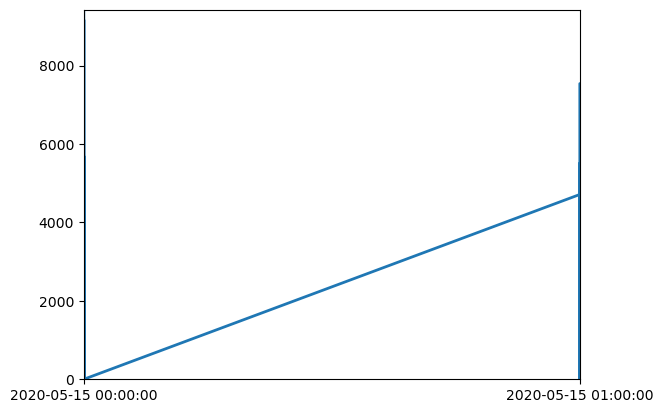

In [11]:
df = df.iloc[:100000]
# Create an empty plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Initialize the plot with empty data
def init():
    ax.set_xlim(df['DATE_TIME'].min(), df['DATE_TIME'].max())
    ax.set_ylim(0, df['DAILY_YIELD'].max())
    return line,

# Update the plot with new data
def update(frame):
    data = df.iloc[:frame+1]  # Slice the DataFrame up to the current frame
    line.set_data(data['DATE_TIME'], data['DAILY_YIELD'])
    return line,

# Animate the plot
ani = FuncAnimation(fig, update, frames=len(df), init_func=init, blit=True)

# Save the animation as a GIF
ani.save('animation.gif', writer='pillow', fps=10)

# Display the GIF
HTML('<img src="animation.gif">')